  # **Importing Libraries**

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras import callbacks
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# **Preprocessing**

In [26]:
batch_size=16
img_size=150
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    #zoom_range=0.3,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    horizontal_flip=True,
                    validation_split=0.3)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"D:\Internship\archive\train with 10 aug",
        target_size=(img_size, img_size),
        color_mode =  'grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training')

validation_generator = validation_datagen.flow_from_directory(
        r"D:\Internship\archive\train with 10 aug",
        target_size=(img_size, img_size),
        color_mode =  'grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        r"D:\Internship\archive\validation",
        target_size=(img_size, img_size),
        color_mode =  'grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False)

Found 8960 images belonging to 6 classes.
Found 3837 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [27]:
train_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

# **Applying callbacks and compiling**

In [29]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_tuned = ModelCheckpoint("./model-11.h5", monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              min_delta=0,
                              patience=3,
                              verbose = 1,
                              restore_best_weights=True
                              )
Reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                                       factor=0.2,
                                       patience=3,
                                       verbose = 1,
                                       min_delta=0.0001
                                       )
callbacks_list_tuned = [checkpoint_tuned,Reduce_learningrate]

epochs = 10

model_tuned.compile(loss ='categorical_crossentropy',
                    optimizer = Adam(learning_rate=0.0001),
                    metrics=['accuracy'])

# **fitting the model**

In [30]:
history_tuned = model_tuned.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list_tuned
                                )
model_tuned.save('model-12.h5')

Epoch 1/10
560/560 [==============================] - ETA: 0s - loss: 29.8538 - accuracy: 0.5260
Epoch 1: val_accuracy improved from -inf to 0.33054, saving model to .\model-11.h5
560/560 [==============================] - 880s 2s/step - loss: 29.8538 - accuracy: 0.5260 - val_loss: 31.3048 - val_accuracy: 0.3305 - lr: 1.0000e-04
Epoch 2/10
560/560 [==============================] - ETA: 0s - loss: 26.8336 - accuracy: 0.6778
Epoch 2: val_accuracy did not improve from 0.33054
560/560 [==============================] - 836s 1s/step - loss: 26.8336 - accuracy: 0.6778 - val_loss: 38.1742 - val_accuracy: 0.2845 - lr: 1.0000e-04
Epoch 3/10
560/560 [==============================] - ETA: 0s - loss: 23.6455 - accuracy: 0.7565
Epoch 3: val_accuracy improved from 0.33054 to 0.35068, saving model to .\model-11.h5
560/560 [==============================] - 878s 2s/step - loss: 23.6455 - accuracy: 0.7565 - val_loss: 25.6954 - val_accuracy: 0.3507 - lr: 1.0000e-04
Epoch 4/10
560/560 [================

**Comparing Loss**

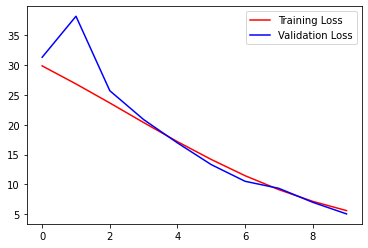

In [31]:
#comparing loss
plt.plot(history_tuned.history['loss'], label='Training Loss',color='red')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss',color='blue')
plt.legend()
plt.show()

**Comparing Accuracy**

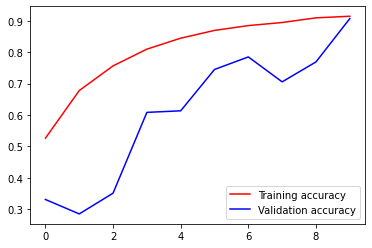

In [32]:
#comparing accuracy
plt.plot(history_tuned.history['accuracy'], label='Training accuracy',color='red')
plt.plot(history_tuned.history['val_accuracy'], label='Validation accuracy',color='blue')
plt.legend()
plt.show()